In [1]:
%pylab inline
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib import pyplot
import seaborn as sns
from scipy.stats import gaussian_kde

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.family'] ='serif'

In [3]:
colors = numpy.array(["#c6878f", "#b79d94", "#969696", "#67697c", "#233b57", "#BCBEC7"])

In [4]:
def calc_bands(x, y):
    miny = numpy.zeros((len(y),3))
    maxy = numpy.zeros((len(y),3))
    
    for i in range(len(y)):
        z = y[i][y[i]>0.0]
        if len(z)<200:
            print('sample too small for %.2f' %x[i])
            continue
        kde = gaussian_kde(z)
        testz = numpy.linspace(min(z),max(z), 1000)
        pdf = kde.pdf(testz)
        array = pdf
        index_68 = numpy.where(numpy.cumsum(numpy.sort(array)[::-1]) < sum(array)*0.6827)[0]
        index_68 = numpy.argsort(array)[::-1][index_68]
        index_95 = numpy.where(numpy.cumsum(numpy.sort(array)[::-1]) < sum(array)*0.95)[0]
        index_95 = numpy.argsort(array)[::-1][index_95]
        miny[i] =  x[i], min(testz[index_68]), min(testz[index_95])
        maxy[i] =  x[i], max(testz[index_68]), max(testz[index_95])
        
    miny = miny[~numpy.all(miny == 0, axis=1)]
    maxy = maxy[~numpy.all(maxy == 0, axis=1)]
    return miny, maxy


In [5]:
energydensities = numpy.logspace(14.2, 16, 50)
pressures_prior = numpy.load('FERMIONIC_REAL_DATA_PRIOR_Pressure_array.npy')
prior_contours = calc_bands(energydensities, pressures_prior)
print(numpy.shape(prior_contours))
maxpres_adm_NI = numpy.load('NICER_REAL_ADM_VARYING_BARYONIC_3k_maxpres.npy')
minpres_adm_NI = numpy.load('NICER_REAL_ADM_VARYING_BARYONIC_3k_minpres.npy')
adm_contours_NI = minpres_adm_NI,maxpres_adm_NI

print(numpy.shape(adm_contours_NI))

sample too small for 6551285568595496.00
sample too small for 7129535313794352.00
sample too small for 7758824319047053.00
sample too small for 8443657568728348.00
sample too small for 9188937680019554.00
sample too small for 10000000000000000.00
(2, 44, 3)
(2, 33, 3)


In [6]:
pressures = numpy.load('POSTERIOR_BARYONIC_REAL_pressures.npy')
contours = calc_bands(energydensities, pressures)
contours_min = contours[0]
contours_max = contours[1]
minpres_ppNI = numpy.log10(contours_min)
maxpres_ppNI = numpy.log10(contours_max)

sample too small for 2583716733631498.50
sample too small for 2811768697974225.00
sample too small for 3059949687207196.00
sample too small for 3330036391323825.00
sample too small for 3623962320002086.50
sample too small for 3943831644306433.50
sample too small for 4291934260128778.50
sample too small for 4670762181205290.00
sample too small for 5083027379064073.00
sample too small for 5531681197617238.00
sample too small for 6019935481383572.00
sample too small for 6551285568595496.00
sample too small for 7129535313794352.00
sample too small for 7758824319047053.00
sample too small for 8443657568728348.00
sample too small for 9188937680019554.00
sample too small for 10000000000000000.00


In [7]:
def mass_radius_posterior_plot(root_name_ADM,root_name_Baryonic,root_prior = None,ax = None):
    pre_scatter_ADM = numpy.loadtxt(root_name_ADM + 'scattered.txt')
    scatter_ADM = []
    for i in range(len(pre_scatter_ADM)):
        if pre_scatter_ADM[i][-1] ==0.: #eliminating any halos that might appear after resampling the central density
            scatter_ADM.append(pre_scatter_ADM[i]) 
            
    scatter_ADM = numpy.array(scatter_ADM)
    
    #figure, ax = pyplot.subplots(1,1, figsize=(9,6))

    
    sns.kdeplot(x = scatter_ADM[:,3], y = scatter_ADM[:,2], gridsize=40, 
               shade=False, ax=ax, levels=[0.05,0.32,1.],bw_adjust = 1.5,
                alpha=1., colors = '#E76F51',linestyles = '-.',linewidths = 3.)


    pre_scatter_prior = numpy.loadtxt(root_prior + 'scattered.txt')
    scatter_prior = []
    for i in range(len(pre_scatter_prior)):
        if pre_scatter_prior[i][-1] ==0.: #eliminating any halos that might appear after resampling the central density
            scatter_prior.append(pre_scatter_prior[i]) 
            
    scatter_prior = numpy.array(scatter_prior)


    
    sns.kdeplot(x = scatter_prior[:,6], y = scatter_prior[:,5], gridsize=40, 
               shade=False, ax=ax, levels=[0.05],bw_adjust = 1.5,
                alpha=1., colors = 'black',linestyles = '--',linewidths = 3.)

    MR_prpr_B= numpy.loadtxt(root_name_Baryonic + 'scattered.txt')

    
    sns.kdeplot(x = MR_prpr_B[:,3], y = MR_prpr_B[:,2], gridsize=40,bw_adjust = 1.5, 
                shade=True, ax=ax, levels=[0.05,0.32,1.],
                alpha=1., colors = sns.cubehelix_palette(8, start=.5, rot=-.75, dark=.2, light=.85)[0::3])
    
    #custom_lines = [Line2D([0],[0],color='#E76F51', alpha=1.,linestyle = '-.',lw = 3.),mpatches.Patch(color=sns.cubehelix_palette(8, start=.5, rot=-.75, dark=.2, light=.85)[0::3][1])]
   # ax.legend(custom_lines, ['Including ADM','Neglecting ADM'],
                #loc='upper left', prop={'size': 16})
    
    ax.set_xlim(9, 15)
    ax.set_xticks([10,11,12,13,14,15])
    ax.set_ylim(1., 2.7)
    ax.set_yticks([1.,1.4,1.8,2.2,2.7])
    
    #ax.set_title('Mass-Radius Posteriors',font = 'serif',fontsize = 24)
    ax.minorticks_on()
    ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=20)
    ax.set_xlabel(r'Radius [km]', fontsize=20)
    ax.set_ylabel(r'Mass [M$_{\odot}$]', fontsize=20)
    
    #figure.savefig('MRpost_real_data.png',bbox_inches='tight')



In [8]:
root_name_ADM = 'NICER_REAL_ADM_VARYING_BARYONIC_3k_'
root_name_B = 'POSTERIOR_BARYONIC_REAL_'
root_prior = 'FERMIONIC_REAL_DATA_PRIOR_'

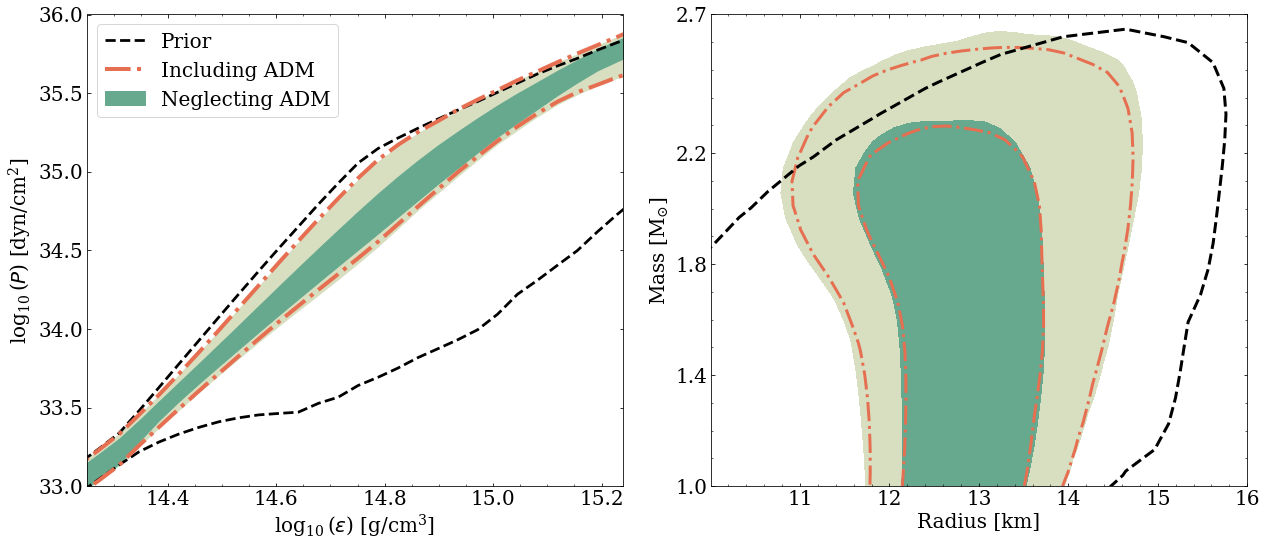

In [9]:
fig, ax = pyplot.subplots(nrows=1, ncols=2,figsize=(18,8))
my_fontsize=20
my_font = 'serif'
matplotlib.rc('font',family = my_font)
matplotlib.rcParams.update({'font.size': 20})

mass_radius_posterior_plot(root_name_ADM,root_name_B,root_prior,ax = ax[1])


#maxpres_ppNI = numpy.log10(numpy.load(root_name_B + 'minpres.npy'))
#maxpres_ppNI = numpy.log10(numpy.load(root_name_B + 'maxpres.npy'))


adm_contours_min = adm_contours_NI[0]
adm_contours_max = adm_contours_NI[1]
minpres_adm = numpy.log10(adm_contours_min)
maxpres_adm = numpy.log10(adm_contours_max)


prior_contours_min = prior_contours[0]
prior_contours_max = prior_contours[1]
minpres_prior = numpy.log10(prior_contours_min)
maxpres_prior = numpy.log10(prior_contours_max)




ax[0].plot(maxpres_prior[:,0], minpres_prior[:,2], c='black', linestyle='--', lw=2.75)
ax[0].plot(maxpres_prior[:,0], maxpres_prior[:,2], c='black', linestyle='--', lw=2.75,label = 'Prior')

ax[0].plot(maxpres_adm[:,0], minpres_adm[:,2], c='#E76F51', linestyle='-.', lw=4)
ax[0].plot(maxpres_adm[:,0], maxpres_adm[:,2], c='#E76F51', linestyle='-.', lw=4,label = 'Including ADM')
ax[0].fill_between(minpres_ppNI[:,0], minpres_ppNI[:,2], maxpres_ppNI[:,2], 
                       color=sns.cubehelix_palette(8, start=.5, rot=-.75, dark=.2, light=.85)[0], alpha=1)
ax[0].fill_between(minpres_ppNI[:,0], minpres_ppNI[:,1], maxpres_ppNI[:,1], 
                       color=sns.cubehelix_palette(8, start=.5, rot=-.75, dark=.2, light=.85)[3], 
                      alpha=1,label = 'Neglecting ADM')
       

ax[0].set_ylabel(r'$\log_{10}(P)$ [dyn/cm$^2$]', size=my_fontsize,font = my_font)



ax[0].legend(loc = 'upper left',fontsize = 20)
ax[0].set_xlim(14.25, 15.24)
ax[0].set_xlabel(r'$\log_{10}(\varepsilon)$ [g/cm$^3$]', fontsize=my_fontsize,font = my_font)
ax[0].set_xticks(numpy.arange(14.25, 15.24,.05),minor =True)
ax[0].set_ylim(33,36)
ax[0].set_yticks([33,33.5,34,34.5,35,35.5,36],minor =True)
ax[0].tick_params(top=1,right=1, which='both', direction='in', labelsize=my_fontsize)

ax[1].set_xlim(10, 16)
ax[1].set_xticks([11,12,13,14,15,16])
ax[1].set_ylim(1., 2.7)
ax[1].set_yticks([1.,1.4,1.8,2.2,2.7])
    
    #ax.set_title('Mass-Radius Posteriors',font = 'serif',fontsize = 24)
ax[1].minorticks_on()
ax[1].tick_params(top=1,right=1, which='both', direction='in', labelsize=20)
ax[1].set_xlabel(r'Radius [km]', fontsize=20)
ax[1].set_ylabel(r'Mass [M$_{\odot}$]', fontsize=20)
    
    

pyplot.tight_layout()
pyplot.show()
fig.savefig('Real_data_posterior.png',bbox_inches='tight')



root_name_B = "POSTERIOR_BARYONIC_REAL_"

#maxradii_no_adm = numpy.load('POSTERIOR_FERMIONIC_REAL_07nsaturation__NO_ADM_maxradii.npy')
#minradii_no_adm = numpy.load('POSTERIOR_FERMIONIC_REAL_07nsaturation__NO_ADM_minradii.npy')
#no_adm_contours = minradii_no_adm,maxradii_no_adm

maxradii_adm = numpy.load('POSTERIOR_FERMIONIC_REAL_07nsaturation_ADM_maxradii.npy')
minradii_adm = numpy.load('POSTERIOR_FERMIONIC_REAL_07nsaturation_ADM_minradii.npy')
adm_contours = minradii_adm,maxradii_adm

masses = numpy.linspace(.2, 2.9, 50)

fig, ax = pyplot.subplots(1,1, figsize=(9,6))
my_fontsize=20
my_font = 'serif'
matplotlib.rc('font',family = my_font)
matplotlib.rcParams.update({'font.size': 20})
   
minradii_B = numpy.load(root_name_B + 'minradii.npy')
maxradii_B = numpy.load(root_name_B + 'maxradii.npy')

#no_adm_contours_min = no_adm_contours[0]
#no_adm_contours_max = no_adm_contours[1]
#minradii_no_adm = no_adm_contours_min
#maxradii_no_adm = no_adm_contours_max

adm_contours_min = adm_contours[0]
adm_contours_max = adm_contours[1]
minradii_adm = adm_contours_min
maxradii_adm = adm_contours_max
#print(minradii_B)
#print(maxradii_B)
#prior_contours_min = prior_contours[0]
#prior_contours_max = prior_contours[1]
#minpres_prior = numpy.log10(prior_contours_min)
#maxpres_prior = numpy.log10(prior_contours_max)

#ax.plot(maxpres_prior[:,0], minpres_prior[:,2], c='black', linestyle='--', lw=2.75)
#ax.plot(maxpres_prior[:,0], maxpres_prior[:,2], c='black', linestyle='--', lw=2.75,label = 'Prior')

ax.plot(maxradii_adm[:,0], maxradii_adm[:,2], c='#E76F51', linestyle='-.', lw=4)
ax.plot(minradii_adm[:,0], minradii_adm[:,2], c='#E76F51', linestyle='-.', lw=4,label = 'ADM')

#ax.plot(maxradii_no_adm[:,0], maxradii_no_adm[:,2], c='Blue', linestyle='--', lw=4)
#ax.plot(minradii_no_adm[:,0], minradii_no_adm[:,2], c='Blue', linestyle='--', lw=4,label = 'NO ADM')

ax.fill_between(minradii_B[:,0], minradii_B[:,2], maxradii_B[:,2], 
                       color=sns.cubehelix_palette(8, start=.5, rot=-.75, dark=.2, light=.85)[0], alpha=1)
ax.fill_between(minradii_B[:,0], minradii_B[:,1], maxradii_B[:,1], 
                       color=sns.cubehelix_palette(8, start=.5, rot=-.75, dark=.2, light=.85)[3], 
                      alpha=1,label = 'Neglecting ADM')
       

ax.xaxis.set_ticks([1., 1.5, 2., 2.5, 3.0])
ax.set_xlabel(r"M (M$_{\odot}$)", fontsize=24)
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=20)
ax.set_ylabel(r"R (km)", fontsize=24)
ax.set_xlim(1., 2.5)
ax.set_ylim(9.05, 16)
ax.tick_params(top=1,right=1, which='both', direction='in', labelsize=my_fontsize)


   
ax.legend(loc = 'upper left',fontsize = 20)
ax.set_title('No ADM Model')
   
#ax[1].set_xlim(14.25, 15.24)
#ax[1].set_xlabel(r'$\log_{10}(\varepsilon)$ (g/cm$^3$)', fontsize=my_fontsize,font = my_font)
#ax[1].set_xticks(numpy.arange(14.25, 15.24,.05),minor =True)
#ax[1].tick_params(top=1,right=1, which='both', direction='in', labelsize=my_fontsize)
   
pyplot.tight_layout()
#fig.savefig('Plot.jpeg',bbox_inches='tight')

def MR_source_posterior_plot(root_name_ADM,root_name_Baryonic,root_prior = None):
    scatter_ADM = numpy.load(root_name_ADM + 'rhoc_scattered.npy',allow_pickle = True)

    
    scatter_B = numpy.load(root_name_Baryonic + 'rhoc_scattered.npy',allow_pickle = True)
    figure, ax = pyplot.subplots(1,1, figsize=(9,6))
    M_max = 0.

    """"
    for i in range(len(scatter_ADM[0])):
        print(scatter_ADM[:,i][:,3])
        inbins = numpy.histogramdd(scatter_ADM[:,i][:,[3,2]], bins=50, normed=True)
        levels = getdist.densities.getContourLevels(inbins[0], contours=[0.68, 0.95])
    
        sns.kdeplot(x = scatter_ADM[:,i][:,3], y = scatter_ADM[:,i][:,2], gridsize=50, 
                   shade=True, ax=ax, n_levels=numpy.array([levels[1],levels[0], 1.]),
                    alpha=1., cmap = 'Reds')
        M_max = max(max(scatter_ADM[:,i][:,2]), M_max)
        
    for i in range(len(scatter_B[0])):
        inbins = numpy.histogramdd(scatter_B[:,i][:,[3,2]], bins=50, normed=True)
        levels = getdist.densities.getContourLevels(inbins[0], contours=[0.68, 0.95])
    
        sns.kdeplot(x = scatter_B[:,i][:,3], y = scatter_B[:,i][:,2], gridsize=50, 
                    shade=False, ax=ax, n_levels=numpy.array([levels[1],levels[0], 1.]),
                    alpha=1., colors = 'black')
        M_max = max(max(scatter_B[:,i][:,2]), M_max)
    """
    scat_ADM_0740 = []
    for i in range(len(scatter_ADM[0])):
        for j in range(len(scatter_ADM[:,i][:,5])):
            if scatter_ADM[:,i][:,5][j] ==0.:
        corner.hist2d(scatter_ADM[:,i][:,3], scatter_ADM[:,i][:,2], labels = ['R [km]', 'M [M$_{\odot}$]'], show_titles=True, 
                    color='Red', smooth=1., data_kwargs={'ms':5, 'alpha':0.5},plot_data_points=False, plot_density=False,
        levels=[0.68, 0.95])
        M_max = max(max(scatter_ADM[:,i][:,2]), M_max)
        
    for i in range(len(scatter_B[0])):
        corner.hist2d(scatter_B[:,i][:,3], scatter_B[:,i][:,2], labels = ['R [km]', 'M [M$_{\odot}$]'], show_titles=True, 
                        color='black', smooth=1., data_kwargs={'ms':5, 'alpha':0.5},plot_data_points=False, plot_density=False,
                    levels=[0.68, 0.95])
        M_max = max(max(scatter_B[:,i][:,2]), M_max)  
        
    
    #custom_lines = [mpatches.Patch(color='Red', alpha=1.),mpatches.Patch(color='black', alpha=1.)]
    #ax.legend(custom_lines, ['ADM Admixed MR','Purley Baryonic MR'],
    #            loc='upper left', prop={'size': 16})
    ax.set_xlim(8, 16)
    ax.set_ylim(1., M_max)
    ax.set_title('Mass-Radius Posteriors',font = 'serif',fontsize = 24)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_xlabel(r'Radius [km]', fontsize=20)
    ax.set_ylabel(r'Mass [M$_{\odot}$]', fontsize=20)
    pyplot.tight_layout()
    pyplot.show()
    
    figure.savefig('Source_MR_posterior.jpeg')



root_name_ADM = 'POSTERIOR_FERMIONIC_REAL_07nsaturation_'
root_name_B = 'POSTERIOR_BARYONIC_REAL_'
MR_source_posterior_plot(root_name_ADM,root_name_B)

pre_scatter_ADM = numpy.load(root_name_ADM + 'rhoc_scattered.npy',allow_pickle = True)
scatter_ADM = []
for i in range(len(pre_scatter_ADM[0])):
    for j in range(len(pre_scatter_ADM[:,i][:,5])):
        if pre_scatter_ADM[:,i][:,5][j] ==0.:
            scatter_ADM.append(pre_scatter_ADM[:,i])

print(pre_scatter_ADM[0])